In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [10]:
path = "/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/thesis2/data/final_tables/erco_2023_andcomposite/erco_2023_andcomposite.csv"



In [40]:
df = pd.read_csv(path)

In [88]:
df2 = df[(df['Region']=='erco') & (df['year']<2023)].reset_index(drop=True)

In [89]:
df2

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,Normalized Forecast,temperature,humidity,cloudcover,windspeed,year,month,day_of_week,day,hour,region_id,2023
0,2016-01-01 00:00:00,34680.0,36278.0,34655.0,erco,-0.870715,-0.711566,9.1,66,95,20.3,2016,1,4,1,0,1.0,0
1,2016-01-01 01:00:00,33846.0,34382.0,33886.0,erco,-0.953776,-0.900394,8.3,64,90,21.9,2016,1,4,1,1,1.0,0
2,2016-01-01 02:00:00,33427.0,34078.0,33469.0,erco,-0.995505,-0.930670,8.1,63,94,21.6,2016,1,4,1,2,1.0,0
3,2016-01-01 03:00:00,33086.0,33807.0,33129.0,erco,-1.029466,-0.957660,7.9,62,93,22.4,2016,1,4,1,3,1.0,0
4,2016-01-01 04:00:00,33048.0,33524.0,33090.0,erco,-1.033251,-0.985844,7.7,60,91,23.9,2016,1,4,1,4,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61363,2022-12-31 19:00:00,41852.0,46097.0,41867.0,erco,-0.156435,0.266337,18.3,54,16,13.2,2022,12,5,31,19,1.0,0
61364,2022-12-31 20:00:00,41114.0,44529.0,41291.0,erco,-0.229935,0.110175,17.3,58,0,12.9,2022,12,5,31,20,1.0,0
61365,2022-12-31 21:00:00,39902.0,42909.0,40582.0,erco,-0.350641,-0.051165,16.6,61,6,14.2,2022,12,5,31,21,1.0,0
61366,2022-12-31 22:00:00,38892.0,41633.0,39902.0,erco,-0.451230,-0.178246,16.2,65,3,16.4,2022,12,5,31,22,1.0,0


In [85]:
df2.count()

timestamp                61369
Demand (MWh)             61369
Demand Forecast (MWh)    61369
Net Generation (MWh)     61122
Region                   61369
Normalized Demand        61369
Normalized Forecast      61369
temperature              61369
humidity                 61369
cloudcover               61369
windspeed                61369
year                     61369
month                    61369
day_of_week              61369
day                      61369
hour                     61369
region_id                61369
2023                     61369
dtype: int64

In [45]:
df = df[df['Region']=='erco'].reset_index(drop=True)
df.head()

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,Normalized Forecast,temperature,humidity,cloudcover,windspeed,year,month,day_of_week,day,hour,region_id,2023
0,2016-01-01 00:00:00,34680.0,36278.0,34655.0,erco,-0.870715,-0.711566,9.1,66,95,20.3,2016,1,4,1,0,1.0,0
1,2016-01-01 01:00:00,33846.0,34382.0,33886.0,erco,-0.953776,-0.900394,8.3,64,90,21.9,2016,1,4,1,1,1.0,0
2,2016-01-01 02:00:00,33427.0,34078.0,33469.0,erco,-0.995505,-0.930670,8.1,63,94,21.6,2016,1,4,1,2,1.0,0
3,2016-01-01 03:00:00,33086.0,33807.0,33129.0,erco,-1.029466,-0.957660,7.9,62,93,22.4,2016,1,4,1,3,1.0,0
4,2016-01-01 04:00:00,33048.0,33524.0,33090.0,erco,-1.033251,-0.985844,7.7,60,91,23.9,2016,1,4,1,4,1.0,0


Start: 2018-01-05 00:00:00
End: 2018-02-09 00:00:00


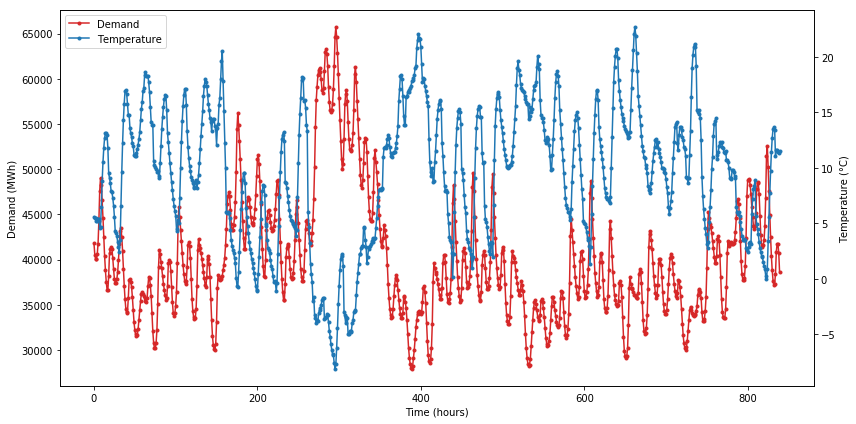

In [83]:
# # # Hot
# start=24*7*92
# length=24*7*5

# Cold
start=24*7*105
length=24*7*5


# Sample data
time = np.arange(0, length)  # Representing 24 hours in a day
load = df["Demand (MWh)"][start:start+length]
temperature = df["temperature"][start:start+length]
print(f"Start: {df['timestamp'][start]}")
print(f"End: {df['timestamp'][start+length]}")
# load = np.random.normal(loc=1000, scale=300, size=time.shape)  # Simulating load data
# temperature = np.random.normal(loc=20, scale=5, size=time.shape)  # Simulating temperature data

fig, ax1 = plt.subplots(figsize=(12,6))

# Plotting load on primary y-axis
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Demand (MWh)')
ax1.plot(time, load, color='tab:red', marker=".", label='Demand')
ax1.tick_params(axis='y')

# Creating a twin Axes sharing the x-axis for temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (°C)')  # We already handled the x-label with ax1
ax2.plot(time, temperature, color='tab:blue', marker=".", label='Temperature')
ax2.tick_params(axis='y')

fig.tight_layout()  # To make the layout tight and nice
# plt.title('Load and Temperature Over Time')

# Adding legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
      
      
plt.savefig(f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/load_temperature_intro_cold.pdf", 
            format="pdf", 
            bbox_inches="tight")

plt.show()



Start: 2018-01-05 00:00:00
Load End: 2018-01-16 00:00:00


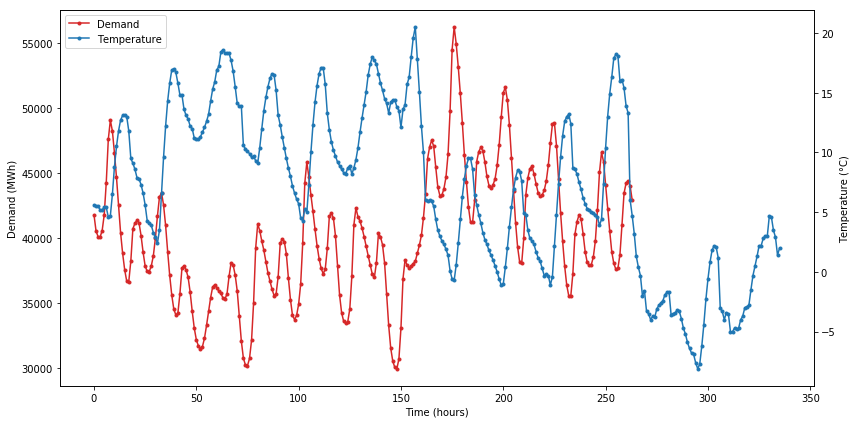

In [81]:
# Cold
start=24*7*105
length_temp=24*7*2
length_load = length_temp-24*3


# Sample data
time_load = np.arange(0, length_load)  # Representing 24 hours in a day\
time_temp = np.arange(0, length_temp)  # Representing 24 hours in a day
load = df["Demand (MWh)"][start:start+length_load]
temperature = df["temperature"][start:start+length_temp]
print(f"Start: {df['timestamp'][start]}")
print(f"Load End: {df['timestamp'][start+length_load]}")
# load = np.random.normal(loc=1000, scale=300, size=time.shape)  # Simulating load data
# temperature = np.random.normal(loc=20, scale=5, size=time.shape)  # Simulating temperature data

fig, ax1 = plt.subplots(figsize=(12,6))

# Plotting load on primary y-axis
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Demand (MWh)')
ax1.plot(time_load, load, color='tab:red', marker=".", label='Demand')
ax1.tick_params(axis='y')

# Creating a twin Axes sharing the x-axis for temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (°C)')  # We already handled the x-label with ax1
ax2.plot(time_temp, temperature, color='tab:blue', marker=".", label='Temperature')
ax2.tick_params(axis='y')

fig.tight_layout()  # To make the layout tight and nice
# plt.title('Load and Temperature Over Time')

# Adding legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
      
      
plt.savefig(f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/load_temperature_intro_cold_predload.pdf", 
            format="pdf", 
            bbox_inches="tight")

plt.show()

